#### Animation of fields

I've added an appropriate colorbar, you can read the explanation at this link: https://joseph-long.com/writing/colorbars/, I also added saving option. Now, if you want to save it as a .gif file just delete '#' symol in corresponding line.

In [179]:
def return_parameters(parameters_file: str):
    with open(parameters_file, 'r') as f:
        TIME_dt_DTS = f.readline().split(' ')
        TIME = (int)(TIME_dt_DTS[0])
        dt = (float)(TIME_dt_DTS[1])
        DTS = (int)(TIME_dt_DTS[2])
        SIZE = f.readline().split(' ')
        SIZE_X = (int)(SIZE[0])
        SIZE_Y = (int)(SIZE[1])
        return TIME, dt, DTS, SIZE_X, SIZE_Y

In [173]:
def return_field_frame(t : int, field_to_read: str):
    with open(field_to_read, 'r') as f:
        f.readline()
        f.readline()
        for n in range(t):
            f.readline() 
            continue
        
        Field = []
        temp = f.readline() 
        temp = temp.split('\t')[:-1]
        for X in range(len(temp)) :
            Field.append(list(map(float, temp[X].split(' ')[:-1])))
        return Field    

In [105]:
import matplotlib.pyplot as plt

def set_imshow(subplot, Field: list, cmap_: str, SIZE_X : int, SIZE_Y : int):
    return subplot.imshow(
        Field,
        cmap = plt.get_cmap(cmap_),
        interpolation="gaussian",
        animated=True,
        origin='lower',
        extent=(0,SIZE_X,0,SIZE_Y),
        #vmin=-0.1, vmax=0.1,
    )

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

def set_colorbar(mappable):
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    cbar = fig.colorbar(mappable,
                        #ticks=np.arange(-0.01,0.02,0.01),
                        orientation="vertical",
                        cax=cax)
    plt.sca(last_axes)
    return cbar

In [183]:
import matplotlib.pyplot as plt

def set_whole_frame(axes, nrows, ncols, F : list, t, field_files, field_titles, SIZE_X, SIZE_Y):
    for file in field_files:
        F.append(return_field_frame(t, file))
        
    
    '''
    for i in range(frames):
        axes[i].set_title(titles[i])
        imshows.append(set_imshow(axes[i], jx, "bwr", SIZE_X, SIZE_Y))
        set_colorbar(imshows[i])
    '''

In [187]:
#########/ field-frame intitializing /#########################################

parameters_file = "jx.txt"
TIME, dt, DTS, SIZE_X, SIZE_Y = return_parameters(parameters_file)

t = 100 # 0 <= t <= TIME/DTS    

field_files = ["jx.txt", "jy.txt",
               "Ex.txt", "Ey.txt", "Ez.txt",
               "Bx.txt", "By.txt", "Bz.txt"]

field_titles = ["$j_x$", "$j_y$", "$E_x$", "$E_y$", "$E_z$",
                "",      "",      "$B_x$", "$B_y$", "$B_z$"]

F = []

nrows = 2
ncols = 5

set_whole_frame(axes, ncols, nrows, F, t, field_files, field_titles, SIZE_X, SIZE_X)

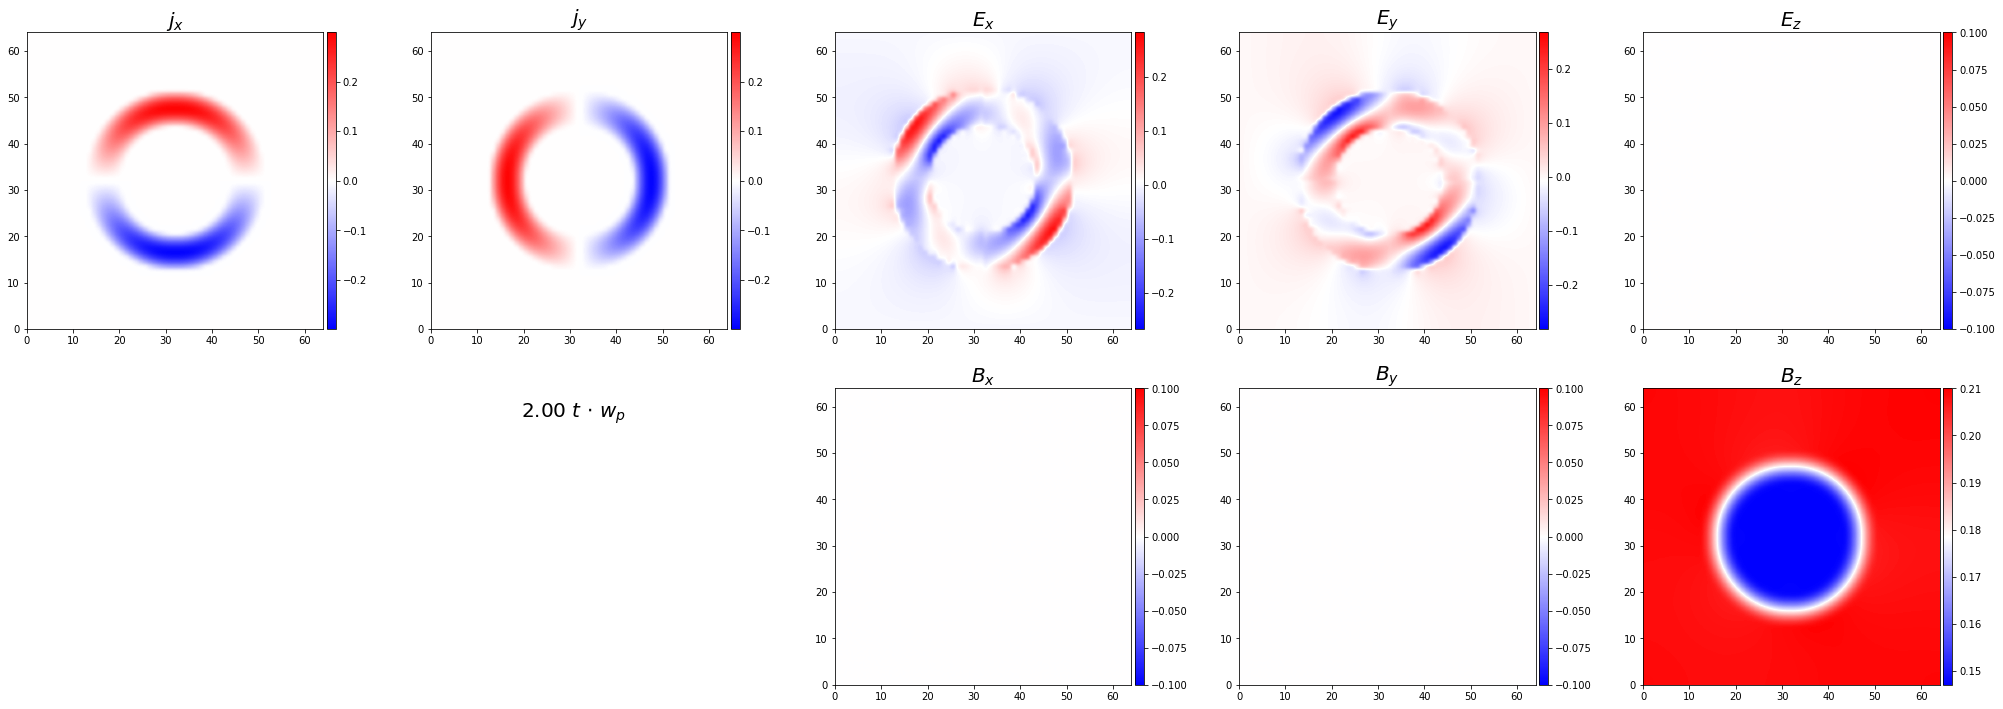

In [188]:
######### / animation /########################################################
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(35,12))

imshows = []

axes[0,0].set_title(titles[0], fontsize=20)
imshows.append(set_imshow(axes[0,0], F[0], "bwr", SIZE_X, SIZE_Y))
set_colorbar(imshows[0])

axes[0,1].set_title(titles[1], fontsize=20)
imshows.append(set_imshow(axes[0,1], F[1], "bwr", SIZE_X, SIZE_Y))
set_colorbar(imshows[1])

axes[0,2].set_title(titles[2], fontsize=20)
imshows.append(set_imshow(axes[0,2], F[2], "bwr", SIZE_X, SIZE_Y))
set_colorbar(imshows[2])

axes[0,3].set_title(titles[3], fontsize=20)
imshows.append(set_imshow(axes[0,3], F[3], "bwr", SIZE_X, SIZE_Y))
set_colorbar(imshows[3])

axes[0,4].set_title(titles[4], fontsize=20)
imshows.append(set_imshow(axes[0,4], F[4], "bwr", SIZE_X, SIZE_Y))
set_colorbar(imshows[4])

axes[1,0].axis('off')

axes[1,1].axis('off')

axes[1,2].set_title(titles[7], fontsize=20)
imshows.append(set_imshow(axes[1,2], F[5], "bwr", SIZE_X, SIZE_Y))
set_colorbar(imshows[5])

axes[1,3].set_title(titles[8], fontsize=20)
imshows.append(set_imshow(axes[1,3], F[6], "bwr", SIZE_X, SIZE_Y))
set_colorbar(imshows[6])

axes[1,4].set_title(titles[9], fontsize=20)
imshows.append(set_imshow(axes[1,4], F[7], "bwr", SIZE_X, SIZE_Y))
set_colorbar(imshows[7])

time_ = fig.text(0.31, 0.9, '%.2f $t\ {\cdot}\ w_p$' %(t*dt), transform=axes[1,1].transAxes, fontsize=20)

plt.show()